# Import Library


In [1]:
import pandas as pd
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from scipy.stats.mstats import winsorize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Load Data

In [2]:
df = pd.read_excel("Dataset Bali.xlsx")


In [3]:
df

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
0,01-01-2010,25,31.2,28.5,84,4.4,6.5,5,270,3,W
1,02-01-2010,26,31.5,28.5,83,0,8,6,270,3,W
2,03-01-2010,27,31.8,29.6,82,1,7.9,6,270,3,W
3,04-01-2010,27,32,28.9,84,0,7.4,6,270,4,W
4,05-01-2010,27,31.8,29.8,81,8888,6.3,6,270,3,W
...,...,...,...,...,...,...,...,...,...,...,...
5716,27-08-2025,24.8,29.2,26.4,76,1,8,7,140,4,SE
5717,28-08-2025,24.8,29.2,26.5,74,0,6,5,140,4,SE
5718,29-08-2025,25,28.6,26.4,74,0.4,7.2,5,140,4,SE
5719,30-08-2025,25,29.4,26.5,76,8888,3,5,130,3,SE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5721 entries, 0 to 5720
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   TANGGAL  5721 non-null   object
 1   TN       5721 non-null   object
 2   TX       5721 non-null   object
 3   TAVG     5721 non-null   object
 4   RH_AVG   5721 non-null   object
 5   RR       5721 non-null   object
 6   SS       5721 non-null   object
 7   FF_X     5721 non-null   int64 
 8   DDD_X    5721 non-null   int64 
 9   FF_AVG   5721 non-null   int64 
 10  DDD_CAR  5721 non-null   object
dtypes: int64(3), object(8)
memory usage: 491.8+ KB


In [5]:
# Drop Kolom yang tidak diperlukan

# Kolom yang ingin disimpan
kolom_dipakai = ['TAVG', 'RH_AVG', 'RR', 'SS', 'FF_AVG']

# Hapus kolom lainnya
df = df[kolom_dipakai]

# Cek hasilnya
df.head()

,TAVG,RH_AVG,RR,SS,FF_AVG
0,28.5,84,4.4,6.5,3
1,28.5,83,0,8,3
2,29.6,82,1,7.9,3
3,28.9,84,0,7.4,4
4,29.8,81,8888,6.3,3


# Preprocessing Data

In [6]:
df

,TAVG,RH_AVG,RR,SS,FF_AVG
0,28.5,84,4.4,6.5,3
1,28.5,83,0,8,3
2,29.6,82,1,7.9,3
3,28.9,84,0,7.4,4
4,29.8,81,8888,6.3,3
...,...,...,...,...,...
5716,26.4,76,1,8,4
5717,26.5,74,0,6,4
5718,26.4,74,0.4,7.2,4
5719,26.5,76,8888,3,3


In [7]:
# 2. Daftar kolom numerik yang ingin diubah ke float
kolom_numerik = ['TAVG', 'RH_AVG', 'RR', 'SS']

# 3. Konversi kolom numerik ke float secara aman
for col in kolom_numerik:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 4. (Opsional) Cek hasil tipe data baru
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5721 entries, 0 to 5720
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TAVG    5663 non-null   float64
 1   RH_AVG  5667 non-null   float64
 2   RR      5650 non-null   float64
 3   SS      5602 non-null   float64
 4   FF_AVG  5721 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 223.6 KB
None


C:\Users\jerel\AppData\Local\Temp\ipykernel_15376\3780746924.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')


In [8]:
# buat kolom baru FF_AVG_kmh hasil konversi dari m/s ke km/h
df["FF_AVG_kmh"] = df["FF_AVG"] * 3.6

# tampilkan 5 baris pertama untuk memastikan hasilnya
print(df[["FF_AVG", "FF_AVG_kmh"]].head())

# cek statistik dasar untuk memastikan masuk akal
print("\nStatistik FF_AVG (m/s):")
print(df["FF_AVG"].describe())

print("\nStatistik FF_AVG_kmh (km/h):")
print(df["FF_AVG_kmh"].describe())

   FF_AVG  FF_AVG_kmh
0       3        10.8
1       3        10.8
2       3        10.8
3       4        14.4
4       3        10.8

Statistik FF_AVG (m/s):
count    5721.000000
mean        3.278273
std         1.321090
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        13.000000
Name: FF_AVG, dtype: float64

Statistik FF_AVG_kmh (km/h):
count    5721.000000
mean       11.801783
std         4.755923
min         0.000000
25%         7.200000
50%        10.800000
75%        14.400000
max        46.800000
Name: FF_AVG_kmh, dtype: float64


C:\Users\jerel\AppData\Local\Temp\ipykernel_15376\1058455805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["FF_AVG_kmh"] = df["FF_AVG"] * 3.6


In [9]:
# ==== 1) Skor komponen HCI:Beach (0–10) ====
def score_TC(tavg):
    if 29 <= tavg <= 33: return 10
    if (27 <= tavg < 29) or (33 < tavg <= 34.9): return 8
    if 25 <= tavg < 27: return 6
    if 23 <= tavg < 25: return 5
    if 21 <= tavg < 23: return 4
    if 19 <= tavg < 21: return 3
    if 17 <= tavg < 19: return 2
    if tavg < 17 or tavg > 35: return 1
    return 6  # fallback

def score_A(ss):
    if ss >= 9: return 10
    if 7 <= ss < 9: return 8
    if 4 <= ss < 7: return 6
    if 2 <= ss < 4: return 4
    if 1 <= ss < 2: return 2
    if ss < 1: return 0
    return 6

def score_P(rr):
    if rr == 0: return 10
    if 0 < rr <= 20: return 8
    if 20 < rr <= 50: return 6
    if 50 < rr <= 100: return 3
    if rr > 100: return 0
    return 6

def score_W(ff_kmh):
    if 0 <= ff_kmh <= 0.59: return 8
    if 0.6 <= ff_kmh <= 9.99: return 10
    if 10 <= ff_kmh <= 19.9: return 9
    if 20 <= ff_kmh <= 29.9: return 8
    if 30 <= ff_kmh <= 39.9: return 6
    if 40 <= ff_kmh <= 49.9: return 3
    if ff_kmh > 50: return 0
    return 8

TC = df["TAVG"].apply(score_TC)
A  = df["SS"].apply(score_A)
P  = df["RR"].apply(score_P)
W  = df["FF_AVG_kmh"].apply(score_W)

# Bobot 2:4:2:2 → skala 0–100
df["HCI_beach_0_100"] = (2*TC + 4*A + 2*P + 2*W)
df["Pantai"] = (df["HCI_beach_0_100"] >= 60).astype(int)

# ==== 2) Hiking ====
df["Hiking"] = (
    (df["TAVG"].between(10, 30, inclusive="both")) &
    (df["RH_AVG"].between(40, 85, inclusive="both")) &
    (df["RR"] < 20) &
    (df["SS"] > 3) &
    (df["FF_AVG_kmh"] < 10)
).astype(int)

# ==== 3) Snorkeling ====
df["Snorkeling"] = (
    (df["TAVG"].between(21, 27, inclusive="both")) &
    (df["FF_AVG_kmh"].between(0, 19, inclusive="both")) &
    (df["SS"].between(4, 9, inclusive="both")) &
    (df["RR"].between(0, 20, inclusive="both"))
).astype(int)

# ==== 4) Rafting ====
df["Rafting"] = (df["RR"] < 100).astype(int)

# Cek distribusi label (wajib biar tahu imbalance)
label_cols = ["Pantai","Hiking","Snorkeling","Rafting"]
print(df[label_cols].sum().rename("positives"))
print((df[label_cols].mean()*100).round(2).rename("positives_%"))


Pantai        5109
Hiking        1210
Snorkeling     822
Rafting       5259
Name: positives, dtype: int64
Pantai        89.30
Hiking        21.15
Snorkeling    14.37
Rafting       91.92
Name: positives_%, dtype: float64


C:\Users\jerel\AppData\Local\Temp\ipykernel_15376\433717444.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["HCI_beach_0_100"] = (2*TC + 4*A + 2*P + 2*W)
C:\Users\jerel\AppData\Local\Temp\ipykernel_15376\433717444.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Pantai"] = (df["HCI_beach_0_100"] >= 60).astype(int)
C:\Users\jerel\AppData\Local\Temp\ipykernel_15376\433717444.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [10]:
df.columns = df.columns.str.lower()

In [11]:
# Mengganti nilai 8888 di kolom 'rr' dengan NaN, lalu mengisinya dengan median
df['rr'] = df['rr'].replace(8888, np.nan)
median_rr = df['rr'].median()
df['rr'].fillna(median_rr, inplace=True)

In [12]:
# Memastikan semua kolom target adalah numerik dan tidak ada nilai yang hilang
for col in ['tavg', 'rh_avg', 'rr', 'ss', 'ff_avg']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(subset=['tavg', 'rh_avg', 'rr', 'ss', 'ff_avg'], inplace=True)

In [13]:
df

,tavg,rh_avg,rr,ss,ff_avg,ff_avg_kmh,hci_beach_0_100,pantai,hiking,snorkeling,rafting
0,28.5,84.0,4.4,6.5,3,10.8,74,1,0,0,1
1,28.5,83.0,0.0,8.0,3,10.8,86,1,0,0,1
2,29.6,82.0,1.0,7.9,3,10.8,86,1,0,0,1
3,28.9,84.0,0.0,7.4,4,14.4,86,1,0,0,1
4,29.8,81.0,0.0,6.3,3,10.8,62,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5716,26.4,76.0,1.0,8.0,4,14.4,78,1,0,1,1
5717,26.5,74.0,0.0,6.0,4,14.4,74,1,0,1,1
5718,26.4,74.0,0.4,7.2,4,14.4,78,1,0,1,1
5719,26.5,76.0,0.0,3.0,3,10.8,46,0,0,0,0


# Modeling

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Asumsi df kamu sudah berisi data seperti yang kamu tunjukkan
label_cols = ["pantai", "hiking", "snorkeling", "rafting"]

# X = semua kolom selain label
X = df.drop(columns=["pantai", "hiking", "snorkeling", "rafting" , "hci_beach_0_100"])
y = df[label_cols]

print("Shape X:", X.shape)
print("Shape y:", y.shape)
print("Fitur:", X.columns.tolist())
print("Label:", y.columns.tolist())

Shape X: (5549, 6)
Shape y: (5549, 4)
Fitur: ['tavg', 'rh_avg', 'rr', 'ss', 'ff_avg', 'ff_avg_kmh']
Label: ['pantai', 'hiking', 'snorkeling', 'rafting']


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Train:", X_train.shape, y_train.shape)
print("Test :", X_test.shape, y_test.shape)

Train: (4439, 6) (4439, 4)
Test : (1110, 6) (1110, 4)


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

# inisialisasi Random Forest
base_rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced_subsample'
)

clf = MultiOutputClassifier(base_rf)
clf.fit(X_train, y_train)

print("✅ Model berhasil dilatih untuk:", y.columns.tolist())

✅ Model berhasil dilatih untuk: ['pantai', 'hiking', 'snorkeling', 'rafting']


In [17]:
from sklearn.metrics import accuracy_score, hamming_loss, classification_report

# prediksi
y_pred = pd.DataFrame(clf.predict(X_test), columns=y.columns, index=y_test.index)

# metrik utama
exact_match_acc = accuracy_score(y_test, y_pred)
hloss = hamming_loss(y_test, y_pred)

print(f"Exact Match Accuracy: {exact_match_acc:.4f}")
print(f"Hamming Loss        : {hloss:.4f}")

# laporan per label
for col in y.columns:
    print(f"\n=== {col.upper()} ===")
    print(classification_report(y_test[col], y_pred[col], digits=4))


Exact Match Accuracy: 0.9135
Hamming Loss        : 0.0324

=== PANTAI ===
              precision    recall  f1-score   support

           0     0.9717    0.8306    0.8957       124
           1     0.9791    0.9970    0.9879       986

    accuracy                         0.9784      1110
   macro avg     0.9754    0.9138    0.9418      1110
weighted avg     0.9783    0.9784    0.9776      1110


=== HIKING ===
              precision    recall  f1-score   support

           0     0.9917    0.9756    0.9836       861
           1     0.9202    0.9719    0.9453       249

    accuracy                         0.9748      1110
   macro avg     0.9559    0.9737    0.9645      1110
weighted avg     0.9757    0.9748    0.9750      1110


=== SNORKELING ===
              precision    recall  f1-score   support

           0     0.9968    0.9884    0.9926       950
           1     0.9345    0.9812    0.9573       160

    accuracy                         0.9874      1110
   macro avg     0

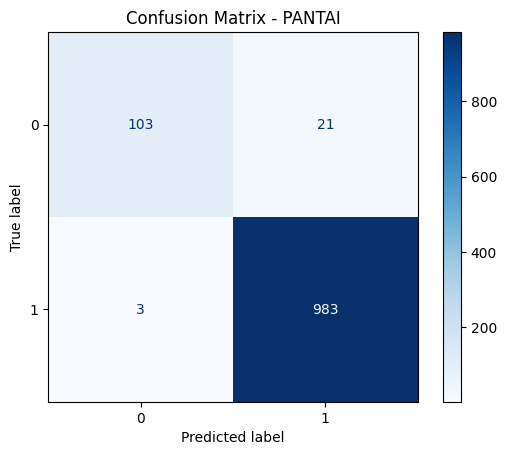

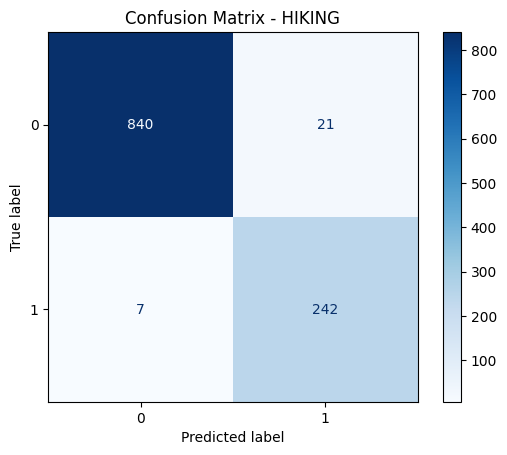

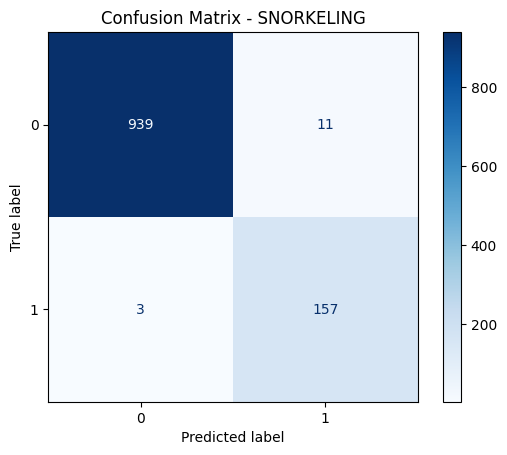

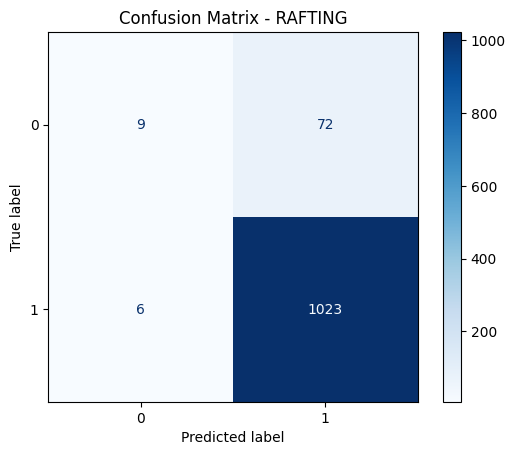

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

for col in y.columns:
    cm = confusion_matrix(y_test[col], y_pred[col])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap="Blues", values_format='d')
    plt.title(f"Confusion Matrix - {col.upper()}")
    plt.show()


In [19]:
import pickle

with open("multi_rf_model.pkl", "wb") as file:
    pickle.dump(clf, file)

print("✅ Model berhasil disimpan sebagai 'multi_rf_model.pkl'")

✅ Model berhasil disimpan sebagai 'multi_rf_model.pkl'


In [20]:
# 1) Ambil daftar kolom fitur yang dipakai saat training
try:
    feat_cols = list(clf.feature_names_in_)  # scikit-learn >=1.0
except AttributeError:
    # fallback kalau atribut ini tidak ada
    feat_cols = X_train.columns.tolist()

def compute_hci_beach_0_100(tavg, ss, rr, ff_avg):
    """
    Heuristik sederhana berbobot 2:4:2:2 (total bobot=10) → skala 0-100
    - TC (thermal comfort): ideal sekitar 28°C (tavg), toleransi ±10°C
    - A (sunshine): ss jam (0..12)
    - P (precipitation): makin kecil makin baik (0 mm terbaik, >20 mm buruk)
    - W (wind): makin pelan makin baik (0..12 m/s)
    """
    # skala 0..1
    TC = np.clip(1 - abs(tavg - 28.0) / 10.0, 0, 1)
    A  = np.clip(ss / 12.0, 0, 1)
    P  = np.clip(1 - rr / 20.0, 0, 1)
    W  = np.clip(1 - ff_avg / 12.0, 0, 1)

    score_0_10 = 2*TC + 4*A + 2*P + 2*W
    return 10.0 * score_0_10  # → 0..100

def prepare_features(df_raw: pd.DataFrame, feat_cols: list) -> pd.DataFrame:
    df = df_raw.copy()

    # --- Normalisasi nama kolom ke lowercase agar konsisten ---
    df.columns = [c.lower() for c in df.columns]

    # --- Konversi ff_avg_kmh → ff_avg (m/s) kalau model butuh ff_avg ---
    if "ff_avg" in feat_cols:
        if "ff_avg" not in df.columns and "ff_avg_kmh" in df.columns:
            df["ff_avg"] = df["ff_avg_kmh"] / 3.6  # km/h → m/s

    # --- Pastikan kolom dasar tersedia (opsional) ---
    # Jika model kamu memang TIDAK pakai tn, tx, ff_x, temp_range → kita abaikan saja.
    drop_if_exist = ["tn", "tx", "ff_x", "temp_range"]
    for c in drop_if_exist:
        if c in df.columns and c not in feat_cols:
            df.drop(columns=[c], inplace=True)

    # --- Hitung hci_beach_0_100 jika memang dipakai model & belum ada ---
    needs_hci = "hci_beach_0_100" in feat_cols and "hci_beach_0_100" not in df.columns
    if needs_hci:
        # butuh tavg, ss, rr, ff_avg (m/s). Cek ketersediaan:
        needed = ["tavg", "ss", "rr"]
        missing = [k for k in needed if k not in df.columns]
        if missing:
            raise ValueError(f"Untuk membuat 'hci_beach_0_100', kolom ini harus ada: {missing}")

        # ff_avg mungkin belum ada kalau model tidak pakai; tapi untuk HCI kita butuh.
        if "ff_avg" not in df.columns:
            if "ff_avg_kmh" in df.columns:
                df["ff_avg"] = df["ff_avg_kmh"] / 3.6
            else:
                # fallback aman (anggap angin tenang 0 m/s)
                df["ff_avg"] = 0.0

        df["hci_beach_0_100"] = df.apply(
            lambda r: compute_hci_beach_0_100(
                tavg=float(r.get("tavg", np.nan)),
                ss=float(r.get("ss", np.nan)),
                rr=float(r.get("rr", np.nan)),
                ff_avg=float(r.get("ff_avg", np.nan)),
            ),
            axis=1
        )

    # --- Tambahkan kolom yang hilang (isi 0) agar jumlah & urutan sama persis ---
    for c in feat_cols:
        if c not in df.columns:
            df[c] = 0

    # --- Susun urutan kolom sama persis dengan saat training ---
    df = df[feat_cols]
    return df

In [21]:
# === 2) Data cuaca baru (lowercase, sesuai yang kamu kirim) ===
data_baru_raw = pd.DataFrame([{
    "rr": 0,           # mm
    "ss": 0,           # jam
    "tn": 0,          # °C  (jika tidak dipakai model akan di-drop)
    "tx": 0,          # °C  (jika tidak dipakai model akan di-drop)
    "tavg": 0,        # °C
    "rh_avg": 0,      # %
    "ff_x": 0,         # m/s (jika tidak dipakai model akan di-drop)
    "ff_avg_kmh": 0,  # km/h → akan dikonversi jika model butuh ff_avg
    "temp_range": 0    # °C (jika tidak dipakai model akan di-drop)
}])

# === 3) Siapkan fitur agar MATCH dengan model ===
X_new = prepare_features(data_baru_raw, feat_cols)

# === 4) Prediksi ===
pred_bin = clf.predict(X_new)
hasil_prediksi = pd.DataFrame(
    pred_bin, columns=["pantai", "hiking", "snorkeling", "rafting"]
)
print("=== HASIL PREDIKSI ===")
print(hasil_prediksi)

=== HASIL PREDIKSI ===
   pantai  hiking  snorkeling  rafting
0       0       0           0        1
